# Introdução

Este projeto tem como objetivo analisar como as pessoas usam dispositivos smart focados em saúde da marca Fitbit para realçar ou descobrir tendências que podem ajudar em futuras campanhas de marketing da Bellabeat.

## **Descrição da Companhia Bellabeat**

Bellabeat é uma fabricante de dispositivos do segmento de saúde voltados a mulheres. A Bellabeat é uma bem-sucedida pequena empresa, mas ela tem o potencial de se tornar um grande competidor no mercado global de dispositivos smart.

# **Fase de Perguntas**

------------------------------------------------------------------------

## Questões Guia

### 1. Quais são algumas tendências no uso de aparelhos smart?

Existem múltiplas possíveis tendências como por exemplo: 

1. Quão ativos os usuários são contra quantas calorias são queimadas por eles;
<br><br>
2. Horas dormidas por dia;
<br><br>
3. Quantas horas são gastas se exercitando diariamente;
<br><br>
4. Quais horários os usuários se exercitam.

### 2. Como essas tendências se aplicam aos clientes da Bellabeat?

As tendências podem ser as mesmas dos clientes da Bellabeat porém a empresa pode não estar ciente da existência delas, podem não estar as rastreando ou até as ignorando por ter uma visão diferente das outras empresas. Encontrar ou destacar tais tendências dão a chance de criar melhores produtos e serviços aos clientes da Bellabeat.

### 3. Como essas tendências podem ajudar a influenciar a estratégia de marketing da Bellabeat? 

Elas podem levar à estratégias que podem alcançar mais clientes ou melhorar a qualidade dos serviços e produtos oferecidos.

### 4. Qual é o problema a ser solucionado?

A necessidade de entender os hábitos do dia-a-dia das pessoas utilizando de dados de outra empresa para criar estratégias e campanhas de marketing de melhor qualidade.

## Atividades Chave

### 1. Identificar a tarefa de negócios:

Analisar dados de dispositivos smart  para revelar tendências baseadas no comportamento dos usuários. 
Identificar possíveis pontos a serem explorados a fim de influenciar estratégias e campanhas de marketing.

### 2. Considerar Stakeholders Chaves

-   **Stakeholders Primários**\
    Urška Sršen: Co-fundador e Líder Diretor de Criação (CEO)\
    Sando Mur: Matemático e co-fundador
    <br><br>
-   **Stakeholders Secundários**\
    Time de Marketing e Analytics da Bellabeat

# Fase de Preparo

------------------------------------------------------------------------

## 1. Onde os dados estão armazenados?

A versão original está armazenada no Kaggle neste [link](kaggle.com/datasets/arashnic/fitbit)

## 2. Como os dados estão organizados?

Os dados estão organizados em 18 arquivos em variados tópicos em formato longo e extenso (long e wide)

## 3. Usando ROCCC para avaliar os dados

**3.1. Reliability:** Os dados podem ser considerados de confiança devido eles terem um tamanho de amostra de 940 para o dataset de atividades diárias e 413 para o de sono diário, porém, existem dois pontos que podem impactar a análise: a divergência entre o número de participantes entre os datasets (33 pessoas no dataset de atividades diárias e 24 nos hábitos diários de sono) e a falta de características de seus participantes (gênero, idade, país, etc).

**3.2. Originality:** O dataset não é original da Bellabeat, ele foi colectado no Amazon Mechanical Turk, uma plataforma de terceiros.

**3.3. Comprehensiveness:** Não há informações que descrevem os participantes, esta falta pode causar víes na análise, especialmente víes de seleção pois a maioria dos clientes da Bellabeats se identificam como do gênero feminino.

**3.4. Current:** Os dados são um pouco obsoletos pois são do ano de 2016 podendo não refletir nas tendências atuais.

**3.5. Cited:** A pesquisa foi criada no Amazon Mechanical Turk o que pode não ser muito confiável pois a plataforma consiste em contratar terceiros para realizar tarefas sob demanda. Também não há nenhum tipo de registro ou característica dos participantes da pesquisa.

## 4. Quão integros são os dados?

Não há nada que categoriza os participantes como gênero ou idade que poderiam melhorar os resultados desta análise. O tamanho da amostra é satisfatório porém a numeração de participantes foi declarada de maneira errônea, em sua fonte estão listados 30 participantes, porém nos dados são encontrados 33 participantes únicos em um dataset e 24 em outro. Em resumo, estes datasets possuem qualidade moderada e podem ser utilizados como base para campanhas ou estratégias de marketing. No mais, essas informações adquiridas poderiam ser empregadas para encontrar insights ou obter conhecimentos sobre as tendências de seus usuários.

# Fase de Processamento

------------------------------------------------------------------------

## 1. Importando bibliotecas

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime

In [2]:
activity = pd.read_csv('daily_activity.csv')
sleep = pd.read_csv('daily_sleep.csv')

### 1.1 Exploração de Dados

### 1.1.1 Tamanho dos Dataframes

In [3]:
len(activity)

940

In [4]:
len(sleep)

413

### 1.1.2 Visão Geral dos Dataframes

In [5]:
#Resumo dos dados
activity.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


In [6]:
#Estatística dos dados
#Alterando o describe para mostrar outras estatisticas relevantes
def describe(df, stats):
    d = df.describe()
    return pd.concat([d,(df.reindex(d.columns, axis = 1).agg(stats))])
describe(activity, ['median', 'skew', 'mad', 'kurt'])

,Id,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
count,9.400000e+02,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000
mean,4.855407e+09,7637.910638,5.489702,5.475351,0.108171,1.502681,0.567543,3.340819,0.001606,21.164894,13.564894,192.812766,991.210638,2303.609574
std,2.424805e+09,5087.150742,3.924606,3.907276,0.619897,2.658941,0.883580,2.040655,0.007346,32.844803,19.987404,109.174700,301.267437,718.166862
min,1.503960e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.320127e+09,3789.750000,2.620000,2.620000,0.000000,0.000000,0.000000,1.945000,0.000000,0.000000,0.000000,127.000000,729.750000,1828.500000
50%,4.445115e+09,7405.500000,5.245000,5.245000,0.000000,0.210000,0.240000,3.365000,0.000000,4.000000,6.000000,199.000000,1057.500000,2134.000000
75%,6.962181e+09,10727.000000,7.712500,7.710000,0.000000,2.052500,0.800000,4.782500,0.000000,32.000000,19.000000,264.000000,1229.500000,2793.250000
max,8.877689e+09,36019.000000,28.030001,28.030001,4.942142,21.920000,6.480000,10.710000,0.110000,210.000000,143.000000,518.000000,1440.000000,4900.000000
median,4.445115e+09,7405.500000,5.245000,5.245000,0.000000,0.210000,0.240000,3.365000,0.000000,4.000000,6.000000,199.000000,1057.500000,2134.000000
skew,1.771249e-01,0.652895,1.126274,1.134550,6.297440,2.996170,2.771194,0.182247,8.589899,2.176143,2.479492,-0.037929,-0.294498,0.422450


Observando este sumário podemos observar que um ou mais participantes gastaram <b>zero</b> calorias durante o dia, algo impossível de se realizar, vamos observar o que está acontecendo.

In [7]:
activity[activity['Calories'] == 0]

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
30,1503960366,5/12/2016,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1440,0
653,6290855005,5/10/2016,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1440,0
817,8253242879,4/30/2016,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1440,0
879,8583815059,5/12/2016,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1440,0


De fato existem registros com zero calorias gastas que serão removidos

In [8]:
#Remoção de registros
activity.drop([30, 653, 817, 879], inplace=True)

In [9]:
#Formato dos dados
activity.dtypes

Id                            int64
ActivityDate                 object
TotalSteps                    int64
TotalDistance               float64
TrackerDistance             float64
LoggedActivitiesDistance    float64
VeryActiveDistance          float64
ModeratelyActiveDistance    float64
LightActiveDistance         float64
SedentaryActiveDistance     float64
VeryActiveMinutes             int64
FairlyActiveMinutes           int64
LightlyActiveMinutes          int64
SedentaryMinutes              int64
Calories                      int64
dtype: object

In [10]:
#Resumo dos dados
sleep.head()

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,4/12/2016 12:00:00 AM,1,327,346
1,1503960366,4/13/2016 12:00:00 AM,2,384,407
2,1503960366,4/15/2016 12:00:00 AM,1,412,442
3,1503960366,4/16/2016 12:00:00 AM,2,340,367
4,1503960366,4/17/2016 12:00:00 AM,1,700,712


In [11]:
#Formatos dos dados
sleep.dtypes

Id                     int64
SleepDay              object
TotalSleepRecords      int64
TotalMinutesAsleep     int64
TotalTimeInBed         int64
dtype: object

In [12]:
#Estatística dos dados
describe(sleep, ['median', 'skew', 'mad', 'kurt'])

,Id,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
count,4.130000e+02,413.000000,413.000000,413.000000
mean,5.000979e+09,1.118644,419.467312,458.639225
std,2.060360e+09,0.345521,118.344679,127.101607
min,1.503960e+09,1.000000,58.000000,61.000000
25%,3.977334e+09,1.000000,361.000000,403.000000
50%,4.702922e+09,1.000000,433.000000,463.000000
75%,6.962181e+09,1.000000,490.000000,526.000000
max,8.792010e+09,3.000000,796.000000,961.000000
median,4.702922e+09,1.000000,433.000000,463.000000
skew,2.832410e-02,2.885607,-0.614977,-0.218636


In [13]:
#Participantes únicos
activity['Id'].nunique()

33

In [14]:
#Participantes únicos
sleep['Id'].nunique()

24

Fora documentado que estes dados teriam 30 participantes únicos, porém 33 foram encontrados no dataset activities e 24 no dataset sleep.

### 1.2 Investigação da Qualidade dos Dados

### 1.2.1 Valores Faltantes

In [15]:
activity.isnull().sum()

Id                          0
ActivityDate                0
TotalSteps                  0
TotalDistance               0
TrackerDistance             0
LoggedActivitiesDistance    0
VeryActiveDistance          0
ModeratelyActiveDistance    0
LightActiveDistance         0
SedentaryActiveDistance     0
VeryActiveMinutes           0
FairlyActiveMinutes         0
LightlyActiveMinutes        0
SedentaryMinutes            0
Calories                    0
dtype: int64

In [16]:
sleep.isnull().sum()

Id                    0
SleepDay              0
TotalSleepRecords     0
TotalMinutesAsleep    0
TotalTimeInBed        0
dtype: int64

Não foram encontrados valores faltantes.

### 1.2.2 Duplicatas

In [17]:
activity[activity.duplicated()]

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories


In [18]:
sleep[sleep.duplicated()]

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
161,4388161847,5/5/2016 12:00:00 AM,1,471,495
223,4702921684,5/7/2016 12:00:00 AM,1,520,543
380,8378563200,4/25/2016 12:00:00 AM,1,388,402


#### 1.2.3 Remoção de Dados Duplicados

In [19]:
sleep = sleep.drop_duplicates()

### 1.2.4 Outliers e Distribuições

A seguir nota-se que existem outliers entre os dados e que deverão ser tratados. Após o tratamento, estaremos utilizando a média normalmente.

<AxesSubplot:>

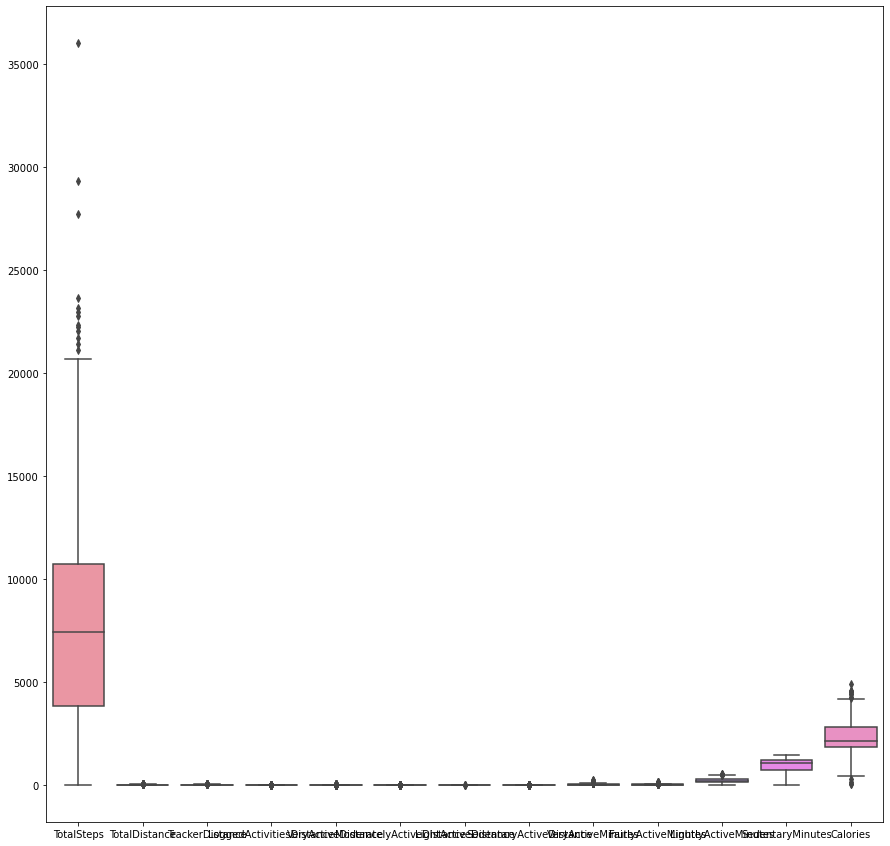

In [20]:
#Outliers do dataset de atividades diárias
plt.figure(figsize=(15,15))
sns.boxplot(data = activity.iloc[:, 1:])

In [21]:
#Quantidade de outliers por coluna em porcentagens
Q1 = activity.iloc[:, 2:].quantile(0.25)
Q3 = activity.iloc[:, 2:].quantile(0.75)
IQR = Q3 - Q1
round(((activity.iloc[:, 2:] < (Q1 - 1.5 * IQR)) | (activity.iloc[:, 2:] > (Q3 + 1.5 * IQR))).sum() / len(activity) * 100, 2)

TotalSteps                  1.39
TotalDistance               2.46
TrackerDistance             2.46
LoggedActivitiesDistance    3.42
VeryActiveDistance          7.80
ModeratelyActiveDistance    6.62
LightActiveDistance         0.53
SedentaryActiveDistance     8.76
VeryActiveMinutes           6.94
FairlyActiveMinutes         5.88
LightlyActiveMinutes        0.64
SedentaryMinutes            0.00
Calories                    1.39
dtype: float64

array([[<AxesSubplot:title={'center':'TotalSteps'}>,
        <AxesSubplot:title={'center':'TotalDistance'}>,
        <AxesSubplot:title={'center':'TrackerDistance'}>,
        <AxesSubplot:title={'center':'LoggedActivitiesDistance'}>],
       [<AxesSubplot:title={'center':'VeryActiveDistance'}>,
        <AxesSubplot:title={'center':'ModeratelyActiveDistance'}>,
        <AxesSubplot:title={'center':'LightActiveDistance'}>,
        <AxesSubplot:title={'center':'SedentaryActiveDistance'}>],
       [<AxesSubplot:title={'center':'VeryActiveMinutes'}>,
        <AxesSubplot:title={'center':'FairlyActiveMinutes'}>,
        <AxesSubplot:title={'center':'LightlyActiveMinutes'}>,
        <AxesSubplot:title={'center':'SedentaryMinutes'}>],
       [<AxesSubplot:title={'center':'Calories'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

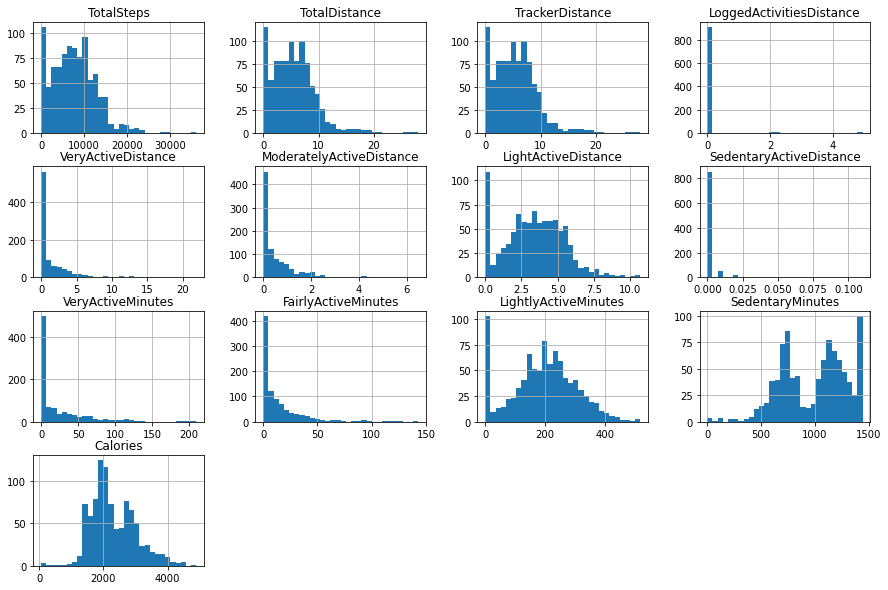

In [22]:
#Distribuição dos dados
activity.iloc[:,1:].hist(bins = 30, figsize=(15,10))

In [23]:
#Remoção de outliers
from numpy import percentile

cols = activity.iloc[:, 3:].columns

for x in cols:
    Q3,Q1 = np.percentile(activity.loc[:,x],[75,25])
    IQR = Q3-Q1
 
    max = Q3+(1.5*IQR)
    min = Q1-(1.5*IQR)
 
    activity.loc[activity[x] < min,x] = np.nan
    activity.loc[activity[x] > max,x] = np.nan

<AxesSubplot:>

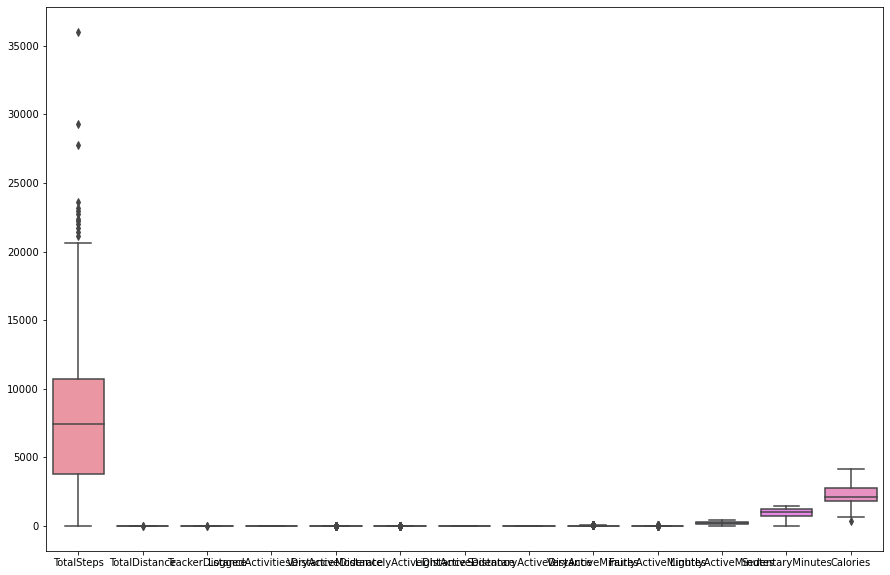

In [24]:
plt.figure(figsize=(15,10))
sns.boxplot(data = activity.iloc[:, 1:])

<AxesSubplot:>

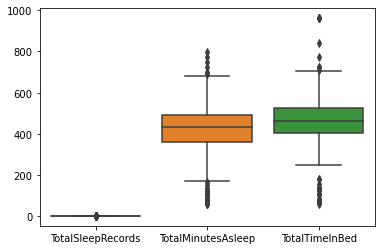

In [25]:
#Outliers do dataset de Sono
sns.boxplot(data = sleep.iloc[:, 1:])

In [26]:
#Quantidade de outliers por coluna em porcentagens
Q1 = sleep.iloc[:, 2:].quantile(0.25)
Q3 = sleep.iloc[:, 2:].quantile(0.75)
IQR = Q3 - Q1
print("Total de linhas:", len(sleep))
round((((sleep.iloc[:, 2:] < (Q1 - 1.5 * IQR)) | (sleep.iloc[:, 2:] > (Q3 + 1.5 * IQR))).sum() / len(sleep)) * 100, 2) 

Total de linhas: 410


TotalSleepRecords     11.22
TotalMinutesAsleep     6.59
TotalTimeInBed         7.32
dtype: float64

array([[<AxesSubplot:title={'center':'TotalSleepRecords'}>,
        <AxesSubplot:title={'center':'TotalMinutesAsleep'}>],
       [<AxesSubplot:title={'center':'TotalTimeInBed'}>, <AxesSubplot:>]],
      dtype=object)

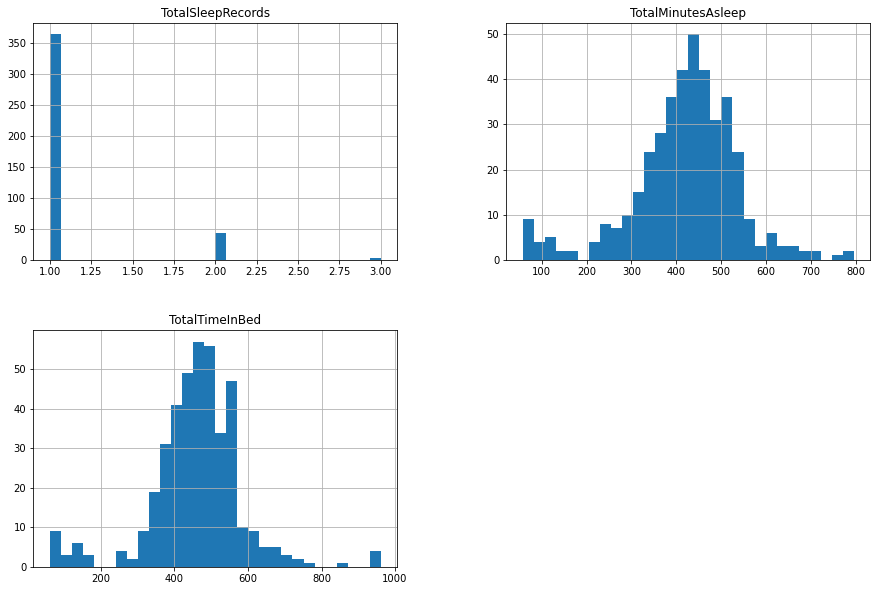

In [27]:
#Distribuição dos dados
sleep.iloc[:,1:].hist(bins = 30, figsize=(15,10))

In [28]:
#Remoção de outliers
cols = sleep.iloc[:, 3:].columns

for x in cols:
    Q3,Q1 = np.percentile(sleep.loc[:,x],[75,25])
    IQR = Q3-Q1
 
    max = Q3+(1.5*IQR)
    min = Q1-(1.5*IQR)
 
    sleep.loc[sleep[x] < min,x] = np.nan
    sleep.loc[sleep[x] > max,x] = np.nan

<AxesSubplot:>

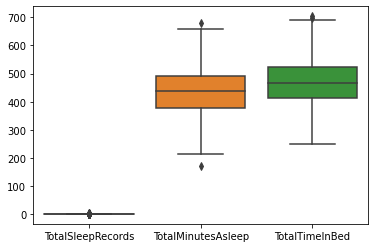

In [29]:
#Outliers do dataset de Sono
sns.boxplot(data = sleep.iloc[:, 1:])

### 1.3 Transformação de Dados

#### 1.3.1 Transformações de Datetime

In [30]:
activity['ActivityDate'] = pd.to_datetime(activity['ActivityDate'], format = '%m/%d/%Y')
activity['ActivityDate'] = activity['ActivityDate'].dt.strftime('%d/%m/%Y') 
activity['ActivityDate'] = pd.to_datetime(activity['ActivityDate'], format='%d/%m/%Y')

In [31]:
activity.dtypes

Id                                   int64
ActivityDate                datetime64[ns]
TotalSteps                           int64
TotalDistance                      float64
TrackerDistance                    float64
LoggedActivitiesDistance           float64
VeryActiveDistance                 float64
ModeratelyActiveDistance           float64
LightActiveDistance                float64
SedentaryActiveDistance            float64
VeryActiveMinutes                  float64
FairlyActiveMinutes                float64
LightlyActiveMinutes               float64
SedentaryMinutes                   float64
Calories                           float64
dtype: object

In [32]:
activity.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,2016-04-12,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25.0,13.0,328.0,728.0,1985.0
1,1503960366,2016-04-13,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21.0,19.0,217.0,776.0,1797.0
2,1503960366,2016-04-14,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30.0,11.0,181.0,1218.0,1776.0
3,1503960366,2016-04-15,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29.0,34.0,209.0,726.0,1745.0
4,1503960366,2016-04-16,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36.0,10.0,221.0,773.0,1863.0


In [33]:
sleep['SleepDay'] = pd.to_datetime(sleep['SleepDay'], format = '%m/%d/%Y %I:%M:%S %p')
sleep['SleepDay'] = sleep['SleepDay'].dt.strftime('%m/%d/%Y %I:%M:%S %p') 
sleep['SleepDay'] = pd.to_datetime(sleep['SleepDay'], format='%m/%d/%Y %I:%M:%S %p')

In [34]:
sleep.dtypes

Id                             int64
SleepDay              datetime64[ns]
TotalSleepRecords              int64
TotalMinutesAsleep           float64
TotalTimeInBed               float64
dtype: object

In [35]:
sleep.head()

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,2016-04-12,1,327.0,346.0
1,1503960366,2016-04-13,2,384.0,407.0
2,1503960366,2016-04-15,1,412.0,442.0
3,1503960366,2016-04-16,2,340.0,367.0
4,1503960366,2016-04-17,1,NaN,NaN


#### 1.3.2 Transformando e Criando Colunas

In [36]:
activity['TotalMinutesActive'] = np.round(activity.iloc[:, 10:-2].sum(axis = 1), 2)
activity.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,TotalMinutesActive
0,1503960366,2016-04-12,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25.0,13.0,328.0,728.0,1985.0,366.0
1,1503960366,2016-04-13,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21.0,19.0,217.0,776.0,1797.0,257.0
2,1503960366,2016-04-14,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30.0,11.0,181.0,1218.0,1776.0,222.0
3,1503960366,2016-04-15,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29.0,34.0,209.0,726.0,1745.0,272.0
4,1503960366,2016-04-16,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36.0,10.0,221.0,773.0,1863.0,267.0


In [37]:
sleep['MinutesToSleep'] = sleep['TotalTimeInBed'] - sleep['TotalMinutesAsleep']
sleep.head()

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,MinutesToSleep
0,1503960366,2016-04-12,1,327.0,346.0,19.0
1,1503960366,2016-04-13,2,384.0,407.0,23.0
2,1503960366,2016-04-15,1,412.0,442.0,30.0
3,1503960366,2016-04-16,2,340.0,367.0,27.0
4,1503960366,2016-04-17,1,NaN,NaN,NaN


### 1.4 Mesclando os datasets baseados em seus IDs

In [38]:
daily_stats = activity.merge(sleep, how='inner', left_on='Id', right_on='Id')

In [39]:
describe(daily_stats.iloc[:, 2:], ['median', 'skew', 'mad', 'kurt'])

,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,TotalMinutesActive,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,MinutesToSleep
count,12323.000000,12279.000000,12279.000000,11707.0,11641.000000,11179.000000,12283.000000,12187.0,11471.000000,11358.000000,12205.000000,12323.000000,12073.000000,12323.000000,12323.000000,11503.000000,11409.000000,11379.000000
mean,8124.338960,5.692911,5.685849,0.0,1.084609,0.473152,3.518640,0.0,16.803243,12.199331,197.398853,798.091861,2308.859024,222.394141,1.121724,431.753629,468.427908,37.946920
std,4472.415633,3.168602,3.160639,0.0,1.375073,0.537464,1.839685,0.0,21.592547,13.425549,93.070265,265.919950,694.908791,103.079641,0.349300,87.500053,81.986017,40.115381
min,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,403.000000,0.000000,1.000000,171.000000,248.000000,1.000000
25%,4676.000000,3.170000,3.170000,0.0,0.000000,0.000000,2.370000,0.0,0.000000,0.000000,144.000000,659.000000,1783.000000,169.000000,1.000000,377.000000,413.000000,18.000000
50%,8596.000000,6.110000,6.110000,0.0,0.370000,0.320000,3.540000,0.0,6.000000,8.000000,199.000000,734.000000,2156.000000,231.000000,1.000000,437.000000,465.000000,26.000000
75%,11317.000000,7.890000,7.880000,0.0,2.000000,0.790000,4.810000,0.0,30.000000,20.000000,258.000000,853.000000,2812.000000,296.000000,1.000000,492.000000,526.000000,39.500000
max,22988.000000,15.080000,15.080000,0.0,5.050000,2.000000,8.970000,0.0,78.000000,47.000000,461.000000,1440.000000,4163.000000,490.000000,3.000000,681.000000,704.000000,243.000000
median,8596.000000,6.110000,6.110000,0.0,0.370000,0.320000,3.540000,0.0,6.000000,8.000000,199.000000,734.000000,2156.000000,231.000000,1.000000,437.000000,465.000000,26.000000
skew,0.019946,-0.004933,-0.007679,0.0,1.125336,1.057519,0.028473,0.0,1.144813,0.910935,-0.183467,0.769699,0.634812,-0.465193,2.831635,-0.095788,0.106616,2.960961


## Fase de Análise

___

### 2.1 Correlações

<AxesSubplot:>

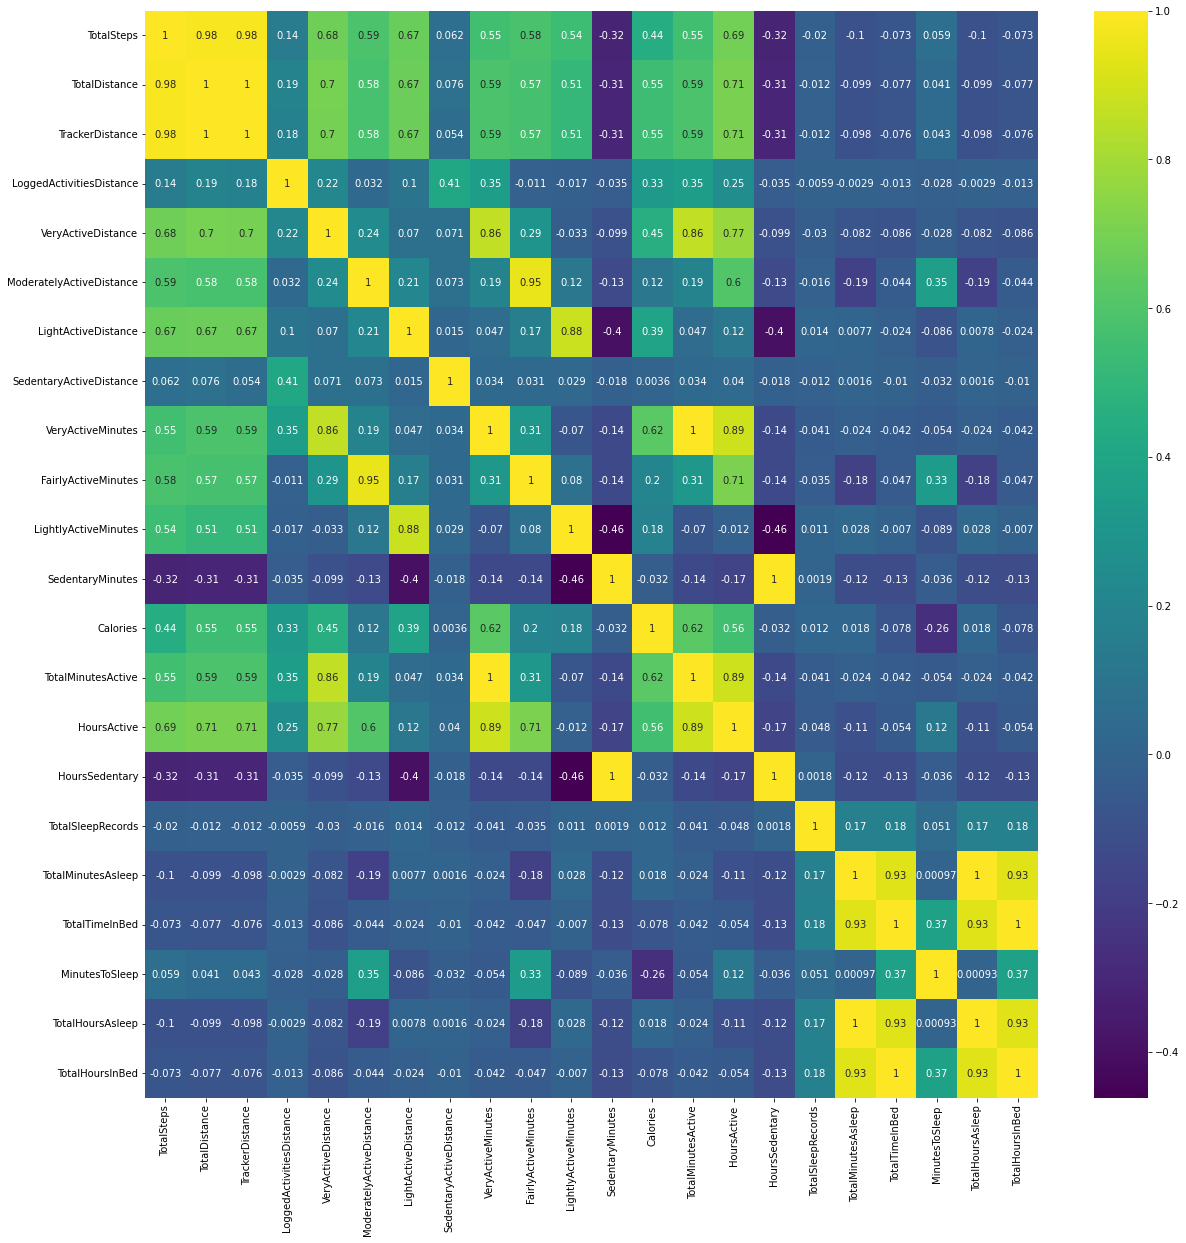

In [63]:
#Criando gráfico de correlação
plt.figure(figsize=(20,20))
sns.heatmap(daily_stats.iloc[:, 2:].corr(),cbar=True,annot=True,cmap='viridis')

Existem correlações positivas entre quase todos os elementos exceto aqueles cujos nomes incluem <b>"Sedentary". </b> <br>
Entretanto, correlações negativas acontecem em diversos casos onde são comparados os tempos de sedentarismo com os tempos em atividade.

In [139]:
describe(daily_stats.iloc[:, 2:], ['median', 'skew', 'mad', 'kurt'])

,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,TotalMinutesActive,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,MinutesToSleep
count,12323.000000,12323.000000,12323.000000,12323.000000,12323.000000,12323.000000,12323.000000,12323.000000,12323.000000,12323.000000,12323.000000,12323.000000,12323.000000,12323.000000,12323.000000,12323.000000,12323.000000,12323.000000
mean,8124.338960,5.733649,5.726612,0.121704,1.400333,0.732344,3.539181,0.000681,23.984338,17.375882,200.254240,798.091861,2327.557738,241.614461,1.121724,419.222105,458.349671,39.127566
std,4472.415633,3.235652,3.227971,0.550709,1.911609,1.037966,1.871786,0.007850,34.903591,23.047798,97.084986,265.919950,753.613207,107.515082,0.349300,118.952533,127.882758,46.834865
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,52.000000,0.000000,1.000000,58.000000,61.000000,0.000000
25%,4676.000000,3.180000,3.180000,0.000000,0.000000,0.000000,2.370000,0.000000,0.000000,0.000000,145.000000,659.000000,1779.500000,193.000000,1.000000,361.000000,402.000000,17.000000
50%,8596.000000,6.120000,6.120000,0.000000,0.530000,0.400000,3.540000,0.000000,8.000000,10.000000,200.000000,734.000000,2158.000000,258.000000,1.000000,432.000000,462.000000,25.000000
75%,11317.000000,7.920000,7.890000,0.000000,2.330000,1.000000,4.830000,0.000000,36.000000,24.000000,258.000000,853.000000,2859.000000,313.000000,1.000000,492.000000,526.000000,39.000000
max,22988.000000,17.950001,17.950001,4.942142,13.400000,6.480000,10.300000,0.110000,210.000000,143.000000,518.000000,1440.000000,4900.000000,540.000000,3.000000,796.000000,961.000000,371.000000
median,8596.000000,6.120000,6.120000,0.000000,0.530000,0.400000,3.540000,0.000000,8.000000,10.000000,200.000000,734.000000,2158.000000,258.000000,1.000000,432.000000,462.000000,25.000000
skew,0.019946,0.116248,0.114998,4.811773,1.841958,2.521195,0.121075,12.596556,2.215032,2.204222,0.032106,0.769699,0.619317,-0.529444,2.831635,-0.596929,-0.194894,3.352739


<b>Observações

A média de passos dados por dia é de 8124;

A média para Muito, Moderada e Curtas Distâncias de Atividade são 1,4, 0,73 e 3,54 kilometros respectivamente;

A media para distância percorrida é de 5,72Km;

A média de calorias gastas por dia é de 2327;

A média de Minutos Ativos é de 241 ou aproximadamente 4 horas;

Participantes tem média de tempo de 798 minutos ou 13,3 horas tempo sedentário diário;

Participantes tem média de tempo de 419 minutos ou aproximadamente 7 horas de sono diário;

Participantes tendem a dormir uma vez por dia.

<b>Deduções

Participantes aparentam se deslocar frequentemente a pé;

Mesmo que os participantes tenham uma média de 13,3 horas de tempo sedentário, eles podem não ser considerados como tal, pois se observarmos os dados "very active" e "fairly active" veremos que temos respectivamente 23 e 17 minutos diários totalizando 280 minutos de atividade moderada a vigorosa por semana, o que é considerado saudável para adultos;

Participantes parecem ter um saudável tempo médio de sono;

Participantes geralmente necessitam de 25 minutos para caírem no sono;

Em média, participantes dormem uma vez ao dia;

Os dados observados aparentam ser apenas de atividades aeróbicas.

# Fase de Apresentação

___

O gráfico a seguir apresenta um dia normal baseado nos dados dos participantes da pesquisa.

([<matplotlib.patches.Wedge at 0x1f3c83cb8b0>,
 [Text(0.9526279355804298, 0.5500000148652441, 'Média de Horas Ativas'),
  Text(-1.0162675251747606, 0.4209516804517681, 'Média de Horas Sedentárias'),
  Text(0.669637680852268, -0.872688590725693, 'Média de Horas de Sono')],
 [Text(0.5196152375893253, 0.30000000810831495, '4.00'),
  Text(-0.5543277410044148, 0.22961000751914623, '13.00'),
  Text(0.3652569168285098, -0.4760119585776507, '7.00')])

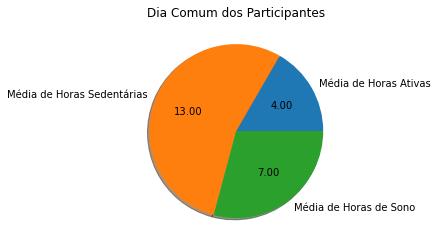

In [43]:
data = [4, 13, 7]
total = sum(data)
labels = ['Média de Horas Ativas', 'Média de Horas Sedentárias', 'Média de Horas de Sono']

plt.title('Dia Comum dos Participantes')
plt.pie(data, labels = labels, autopct= lambda p: '{:.02f}'.format(p * total / 100), shadow = True)

Atividades diárias dos participantes organizadas por tempo gasto.

Observando o gráfico acima é possível notar que os participantes tem tempos saudáveis de sono e aparentam ser bastante ativos.

No gráfico a seguir observaremos em maior detalhe quão ativos os participantes foram durante a pesquisa. 

<BarContainer object of 3 artists>

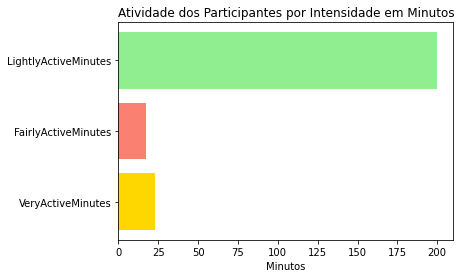

In [41]:
label = ['VeryActiveMinutes', 'FairlyActiveMinutes', 'LightlyActiveMinutes']
data = [23, 17, 200]

plt.title('Atividade dos Participantes por Intensidade em Minutos')
plt.xlabel('Minutos')
plt.barh(label, data, color=['gold', 'salmon', 'lightgreen'], )

Na imagem acima podemos ver que os participantes da pesquisa investiram em média uma quantidade acima do ideal de tempo por dia em atividades moderadas a intensas, se multiplicarmos estes números por 7 (com o intuito de termos a média semanal) veremos que eles atingem uma média de 161 minutos de atividades intensas e 119 minutos de atividades moderadas o que é considerado ideal baseado [neste texto](https://www.allianzcare.com/en/about-us/blog/2020/01/sedentary-life.html) da Allianz Care.

# Fase de Ação

___

# Conclusão
Nos dados analisados fica claro que a maioria dos participantes não são sedentários. Também vale notar que eles aparentam andar bastante durante o dia-a-dia e que isso poderia ser uma tendência a ser explorada a fim de criar ou melhorar as campanhas de marketing. No todo, podemos dizer que os usuários são ávidos praticantes de atividades físicas e que pode existir espaço para explorar outras metragens não baseadas em distâncias percorridas.

# Recomendações
1. Criar uma solução de gamificação para influenciar os usuários a serem menos inativos e a praticar exercícios mais vigorosos;
<br><br>
2. Incluir uma função que monitora a atividade dos usuários em suas camas para melhor entender se eles estão tentando dormir, estão dormindo ou alguma outra atividade; 
<br><br>
3. Incluir um notificador automático que detecta quanto tempo o usuário está sedentário e envia um alerta para notificá-lo para que o usuário se exercite ou simplesmente se movimente para cortar este tempo em sedentarismo.